In this code, the goal is to determine what the optimal stride length percentage is in order to yield the fastest pitching speeds for fastballs.
Created a model in order to predict pitch speeds based on stride length.
Then created a plot with stride length, predicted pitch linear regression, and optimal stride length.

The optimal stride length came out to be 99.56% of the player's height.
The optimal stride length is going to vary from player to player based on the mobility, strength, and balance of the player.

Optimal Stride Length: 0.9956
Predicted Fastest Pitch Speed: 86.71306647409233


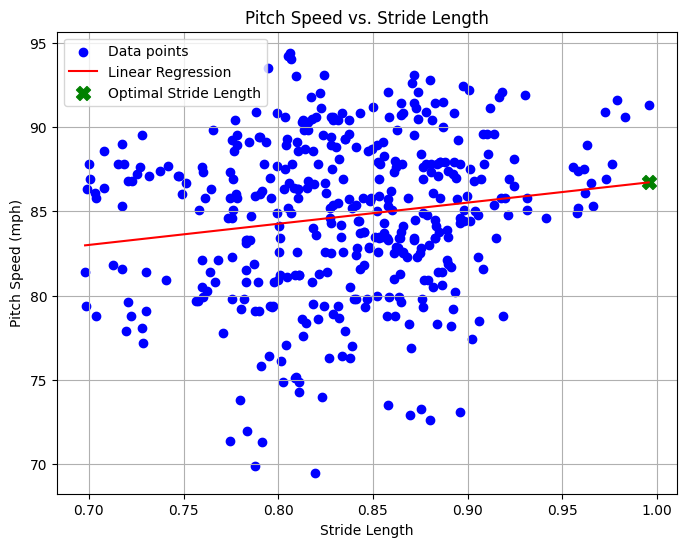

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read data from the CSV file
data = pd.read_csv('poi_metrics.csv')

# Extract pitch speed and stride length from the data
pitch_speed_mph = data['pitch_speed_mph'].values
stride_length_decimal = data['stride_length'].values

# Reshape the data to fit the model (needed for single feature)
stride_length_decimal = stride_length_decimal.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(stride_length_decimal, pitch_speed_mph)

# Predict pitch speed for a range of stride lengths
stride_lengths_range = np.linspace(min(stride_length_decimal), max(stride_length_decimal), num=100).reshape(-1, 1)
predicted_pitch_speeds = model.predict(stride_lengths_range)

# Find the optimal stride length for the fastest pitch
optimal_idx = np.argmax(predicted_pitch_speeds)
optimal_stride_length = stride_lengths_range[optimal_idx][0]
optimal_pitch_speed = predicted_pitch_speeds[optimal_idx]

# Print the results
print("Optimal Stride Length:", optimal_stride_length)
print("Predicted Fastest Pitch Speed:", optimal_pitch_speed)

# Create a scatter plot and plot the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(stride_length_decimal, pitch_speed_mph, color='blue', label='Data points')
plt.plot(stride_lengths_range, predicted_pitch_speeds, color='red', label='Linear Regression')
plt.scatter(optimal_stride_length, optimal_pitch_speed, color='green', label='Optimal Stride Length', s=100, marker='X')
plt.title('Pitch Speed vs. Stride Length')
plt.xlabel('Stride Length')
plt.ylabel('Pitch Speed (mph)')
plt.legend()
plt.grid(True)
plt.show()
